<a href="https://colab.research.google.com/github/elifberkman/deep-learning-prereaquisites/blob/master/numpy-stack-v2/Numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Numpy

In [1]:
import numpy as np

## Arrays vs Lists

In [ ]:
L = [1,2,3]

In [ ]:
A = np.array([1,2,3])

In [ ]:
for e in L:
  print(e)

1
2
3


In [ ]:
for i in A:
  print(i)

1
2
3


In [ ]:
L.append(4)
L

[1, 2, 3, 4]

In [ ]:
A.append(4)

AttributeError: ignored

And so why is that.

Well generally speaking the size of a list can change but the size of an array is fixed.

There are other ways to kind of get items to an array but these actually instantiate a new array 

if you're more advanced in programming maybe you understand why that might be the case in terms of memory storage and efficiency.

In any case let's consider a similar scenario where we can try to add a new item to a list.

So another way of doing this is to simply add two lists together.

In [ ]:
L + [5]

[1, 2, 3, 4, 5]

In [ ]:
A + np.array([4])

array([5, 6, 7])

That's "broadcasting"

In [ ]:
A + np.array([4,5,6])

array([5, 7, 9])

In [ ]:
A + np.array([4,5])

ValueError: ignored

In [ ]:
2 * A

array([2, 4, 6])

In [ ]:
2 * L

[1, 2, 3, 4, 1, 2, 3, 4]

In [ ]:
L + L

[1, 2, 3, 4, 1, 2, 3, 4]

In [ ]:
L2 = []
for e in L:
  L2.append(e+3)
L2

[4, 5, 6, 7]

In [ ]:
L2 = [e + 3 for e in L]
L2

[4, 5, 6, 7]

In [ ]:
L**2

TypeError: ignored

In [ ]:
L2 = []
for e in L:
  L2.append(e**2)
L2

[1, 4, 9, 16]

In [ ]:
A**2

array([1, 4, 9])

In [ ]:
np.sqrt(A)

array([1.        , 1.41421356, 1.73205081])

In [ ]:
np.log(A)

array([0.        , 0.69314718, 1.09861229])

In [ ]:
np.exp(A)

array([ 2.71828183,  7.3890561 , 20.08553692])

In [ ]:
np.tanh(A)

array([0.76159416, 0.96402758, 0.99505475])

## The Dot Product

$$ a \cdot b = a^T b = \sum_{d=1}^D a_d b_d $$

In [ ]:
a = np.array([1,2])
b = np.array([3,4])

In [ ]:
dot = 0
for e, f in zip(a, b):
  dot += e * f
dot

11

In [ ]:
dot = 0
for i in range(len(a)):
  dot += a[i] * b[i]
dot

11

In [ ]:
a * b

array([3, 8])

In [ ]:
np.sum(a * b)

11

In [ ]:
(a * b).sum()

11

In [ ]:
np.dot(a, b)

11

In [ ]:
a.dot(b)

11

In [ ]:
a @ b # newer version of numpy

11

$$ a^T b = \left\lVert a \right\rVert \left\lVert b \right\rVert \cos \theta_{ab}$$

$$ \cos \theta_{ab} = \frac{a^T b}{\left\lVert a \right\rVert \left\lVert b \right\rVert} $$

$$ \left\lVert a \right\rVert = \sqrt{\sum_{d=1}^D a_d^2 } $$

In [ ]:
amag = np.sqrt((a * a).sum())
amag

2.23606797749979

In [ ]:
np.linalg.norm(a)

2.23606797749979

In [ ]:
cosangle = a.dot(b) / (np.linalg.norm(a) * np.linalg.norm(b))
cosangle

0.9838699100999074

In [ ]:
angle = np.arccos(cosangle) 
# You might want to double check this but I'm pretty sure this is in radians and not degrees.
angle

0.17985349979247847

## Speed Test

In [ ]:
## speed comparison ##
from datetime import datetime

# note: you can also use %timeit

a = np.random.randn(100)
b = np.random.randn(100)
T = 100000

def slow_dot_product(a, b):
  result = 0
  for e, f in zip(a, b):
    result += e*f
  return result

t0 = datetime.now()
for t in range(T):
  slow_dot_product(a, b)
dt1 = datetime.now() - t0

t0 = datetime.now()
for t in range(T):
  a.dot(b)
dt2 = datetime.now() - t0

print("dt1 / dt2:", dt1.total_seconds() / dt2.total_seconds())


dt1 / dt2: 48.87237630022689


## Matrices

First let's start with the fact that there is an actual object in numpy called Matrix. 
But this is not recommended to use basically a matrix by definition must be two dimensional whereas 
a numpy array can be any dimensional whether that's 1 2 3 or more.

So if you ever see a matrix out in the wild you should probably convert it to an array first before you do any processing.

One exception to that is sparse matrices in scipy but that's a story for another day.

In [ ]:
L = [[1,2], [3,4]]
L

[[1, 2], [3, 4]]

In [ ]:
L[0]

[1, 2]

In [ ]:
L[0][1]

2

In [ ]:
A = np.array([[1,2],[3,4]])
A

array([[1, 2],
       [3, 4]])

In [ ]:
A[0][1]

2

In [ ]:
A[0, 1]

2

In [ ]:
A[:, 0]

array([1, 3])

In [ ]:
A.T

array([[1, 3],
       [2, 4]])

In [ ]:
np.exp(A)

array([[ 2.71828183,  7.3890561 ],
       [20.08553692, 54.59815003]])

In [ ]:
np.exp(L)

array([[ 2.71828183,  7.3890561 ],
       [20.08553692, 54.59815003]])

So what's interesting about this is numpy already knows what your list represents and treats it as if it were a numpy array.

In addition the thing you get back is an actual numpy array and you'll find that things work like this all throughout the numpy staff.

So for example if I want to pass in some data into a scikitlearn or matplotlib it's OK to just pass in a list. There's no need to convert it into a numpy array first.

In [ ]:
B = np.array([[1,2,3], [4,5,6]])
B

array([[1, 2, 3],
       [4, 5, 6]])

In [ ]:
A.dot(B)

array([[ 9, 12, 15],
       [19, 26, 33]])

Now you might wonder why is it a dot B not a star B as you may recall the star does elementwise multiplication which is not the same as matrix multiplication.

And as we mentioned earlier matrix multiplication is a generalization of the dot product.

Hence it makes perfect sense for matrix multiplication to be performed by the DOT function. 

I usually like to emphasize the rule that in matrix multiplication the inner dimensions must match.

In [ ]:
# error! inner dimensions must match
A.dot(B.T)

ValueError: ignored

In [ ]:
np.linalg.det(A)

-2.0000000000000004

In [ ]:
np.linalg.inv(A)

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

In [ ]:
np.linalg.inv(A).dot(A)

array([[1.00000000e+00, 0.00000000e+00],
       [1.11022302e-16, 1.00000000e+00]])

In [ ]:
A.dot(np.linalg.inv(A))

array([[1.0000000e+00, 0.0000000e+00],
       [8.8817842e-16, 1.0000000e+00]])

Well we get this because inverting a matrix is an inaccurate operation in a computer.

The algorithms that we use to actually compute these operations are not exact.

So always be careful when you're using the matrix inverse and think about whether you actually need
to do it or if your equation can be simplified also recall it.

In [ ]:
np.trace(A)

5

In [ ]:
np.diag(A)

array([1, 4])

In [ ]:
np.diag([1,4])

array([[1, 0],
       [0, 4]])

This is by the way called a diagonal matrix.

So just keep in mind that this function is overloaded.

If you put in a matrix you get a vector.

In [ ]:
np.linalg.eig(A)

(array([-0.37228132,  5.37228132]),
 array([[-0.82456484, -0.41597356],
        [ 0.56576746, -0.90937671]]))

Basically the first return value is an array containing all the eigenvalues and the second return value is an array containing all the ion vectors organized into a matrix.

In [ ]:
Lam, V = np.linalg.eig(A)

In [ ]:
Lam

array([-0.37228132,  5.37228132])

In [ ]:
V

array([[-0.82456484, -0.41597356],
       [ 0.56576746, -0.90937671]])

Now by convention eigen vectors are stored as column vectors inside V.

In [ ]:
V[:, 0] * Lam[0] == A @ V[:, 0]

array([ True, False])

So interestingly we get back in array containing 1 true and 1 false. This might be surprising to you since equals equals just returns a true or false.

But in fact like many numpy operators this too operates element wise both the left hand side and right hand side return a vector of size 2 and therefore we're comparing two vectors of size 2 with the equals equals.

In [ ]:
V[:, 0] * Lam[0], A @ V[:, 0]

(array([ 0.30697009, -0.21062466]), array([ 0.30697009, -0.21062466]))

Interestingly the values do look like they are the same. And yet numpy thinks they are not equal.

Of course this is due to a numerical position since computers don't have an infinite amount of memory.

They can't have an infinite amount of precision and therefore numbers have to be rounded off at some point.

That's why you'll see terms like 32 bit or 64 bit which tells you how much space each floating point
number takes off.

So in numpy the correct way to compare whether to arrays are equal is to use the numpy all close function

In [ ]:
np.allclose(V[:, 0] * Lam[0], A @ V[:, 0])

True

In [ ]:
np.allclose(V @ np.diag(Lam), A @ V)

True

if you know that your matrix is symmetric then you can use the function and beat up the linalg.eigh which is better for that scenario.

The h here stands for Hermitian  (conjugate symmetric) which is the complex analogue of the matrix transpose.

It does both a transpose and takes the complex conjugate of the elements.

So just so you're aware numpy does handle complex numbers.

If you're doing signal processing or quantum mechanics or something like that. 

In practice usually you'll use eigen decomposition on a symmetric matrix like the covariance.

So when that's the case you should use eigh instead which has the same API.

## Solving Linear Systems

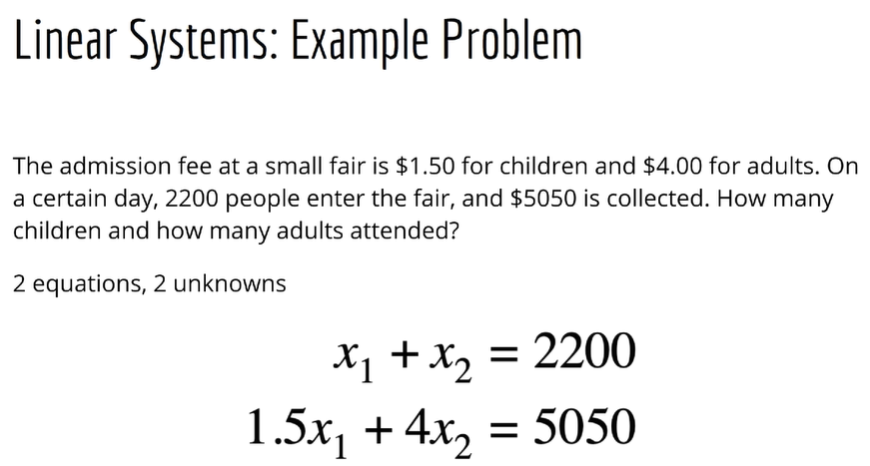

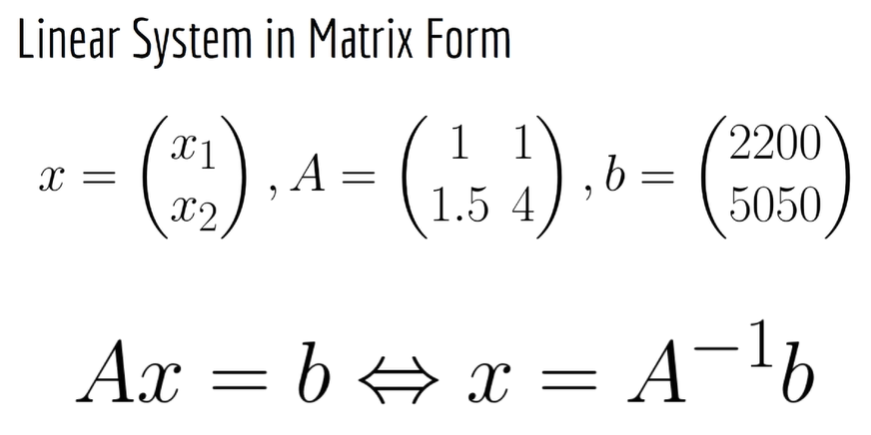

[

*   Liste öğesi
*   Liste öğesi

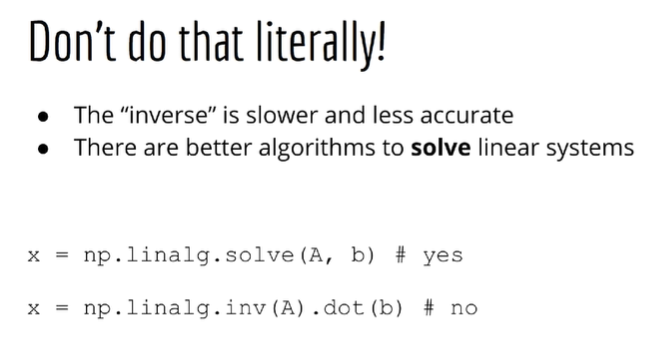

In [ ]:
A = np.array([[1, 1],[1.5, 4]])
b = np.array([2200, 5050])

In [ ]:
np.linalg.solve(A, b)

array([1500.,  700.])

In [ ]:
np.linalg.inv(A).dot(b)

array([1500.,  700.])

## Generating Data

In [2]:
np.zeros((2, 3))

array([[0., 0., 0.],
       [0., 0., 0.]])

In [3]:
np.ones((2, 3))

array([[1., 1., 1.],
       [1., 1., 1.]])

In [4]:
10 * np.ones((2, 3))

array([[10., 10., 10.],
       [10., 10., 10.]])

In [5]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [6]:
np.random.random()

0.09311329196584006

In [7]:
np.random.random((2, 3))

array([[0.1472093 , 0.76671783, 0.41705102],
       [0.52836656, 0.88501417, 0.22360171]])

In [8]:
np.random.randn(2, 3)

array([[0.20297542, 0.54600942, 0.14103344],
       [1.16561309, 0.66845131, 1.0451558 ]])

In fact this function draws random numbers from the standard normal distribution meaning that this data has means zero and variance 1.

Now what's very odd about the random function is that unlike zeros and ones at random, this function does not accept a tuple as input for the shape.

Instead each dimension is passed in as a separate argument.

In [9]:
R = np.random.randn(10000)

In [10]:
R.mean()

-0.006290819189687498

And as with a few other functions this is also a top level function as well as an instance method.

In [11]:
np.mean(R)

-0.006290819189687498

In [21]:
R.var()

0.9988567875081009

In [22]:
R.std()

0.9994282302937519

In [27]:
np.allclose(R.var(), R.std()**2)

True

In [13]:
R = np.random.randn(10000, 3)

In [14]:
R.mean(axis=0)

array([ 0.01402284,  0.00020045, -0.01566859])

In [28]:
R.mean(axis=1)

array([-0.62935506, -0.5654467 ,  0.36878887, ..., -0.10545456,
       -0.23862912, -0.81779311])

In [29]:
R.mean(axis=1).shape

(10000,)

And so when you have vectors the analogue of the variance is the covariance.

In [30]:
np.cov(R)

array([[ 2.14930692, -0.64296689,  1.33825998, ..., -1.60307687,
        -0.7383545 , -1.18230734],
       [-0.64296689,  0.19796515, -0.47657241, ...,  0.4969527 ,
         0.17468709,  0.39241068],
       [ 1.33825998, -0.47657241,  1.86707568, ..., -1.23400049,
         0.16670616, -1.26129902],
       ...,
       [-1.60307687,  0.4969527 , -1.23400049, ...,  1.24947259,
         0.407794  ,  1.00163564],
       [-0.7383545 ,  0.17468709,  0.16670616, ...,  0.407794  ,
         0.63324101,  0.08795083],
       [-1.18230734,  0.39241068, -1.26129902, ...,  1.00163564,
         0.08795083,  0.91712399]])

In [16]:
np.cov(R).shape

(10000, 10000)

So what we've learned is that the co function by default treats each column as a vector observation and by the way this is not the convention and the rest of the numpy stack.

So for example if you're using scikitlearn our tensorflow or PyTorch we do expect that each row is a sample observation.

In any case we can easily fix this by transposing our first so we can do np.cov(R.T) and this is a three by three matrix as expected and also as expected it's close to identity another option is to use the argument rowvar.

In [17]:
np.cov(R.T)

array([[ 9.96747970e-01,  7.31972423e-03,  2.56070173e-02],
       [ 7.31972423e-03,  1.01883147e+00, -5.55831993e-05],
       [ 2.56070173e-02, -5.55831993e-05,  9.80849080e-01]])

In [18]:
np.cov(R, rowvar=False)

array([[ 9.96747970e-01,  7.31972423e-03,  2.56070173e-02],
       [ 7.31972423e-03,  1.01883147e+00, -5.55831993e-05],
       [ 2.56070173e-02, -5.55831993e-05,  9.80849080e-01]])

In [19]:
np.random.randint(0, 10, size=(3, 3))

array([[2, 2, 9],
       [5, 7, 4],
       [0, 7, 0]])

In [20]:
np.random.choice(10, size=(3, 3))

array([[5, 7, 2],
       [8, 7, 4],
       [2, 8, 3]])